In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.style.use('default')

- **Vendor Analysis**:
    - As there are near $10K$ liquor products and only $300+$ vendors. 
    So most of the vendors must be selling multiple products. How many product does a vendor sell?
    How does it evolve w.r.t. time?  How many categories do these product fall into?
    
    - How many sales channels (retail stores) does each vendor have and how does it evolve w.r.t. time?
    - Are different vendors supplying the same product? Are different vendors supplying the same stores?
    - Are there direct competitions among different vendors? Depict a story (case study) on their sale-channel
    growth/shrinkage.

In [2]:
conn = sqlite3.connect('IowaLiquor.db')

In [3]:
product = pd.read_sql_query("SELECT DISTINCT * FROM Item", conn)

In [4]:
product_per_vendor = product.groupby('VendorName').agg(Freq=('ItemNumber', 'count'))
product_per_vendor = product_per_vendor.sort_values('Freq', ascending=False)

<AxesSubplot:ylabel='Count'>

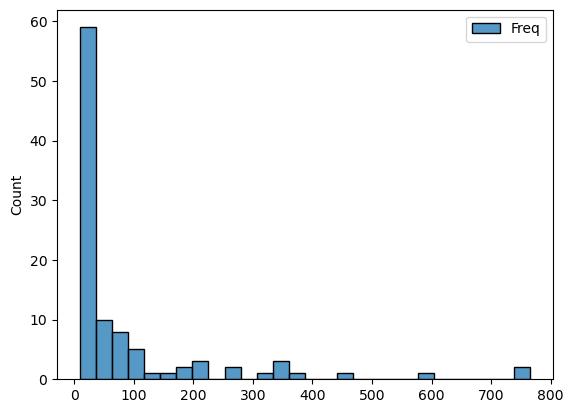

In [5]:
sns.histplot(product_per_vendor.iloc[0:100])

In [6]:
product_per_cat = product.groupby('CategoryName').agg(Freq=('ItemNumber', 'count'))
product_per_cat = product_per_cat.sort_values('Freq', ascending=False)

<AxesSubplot:xlabel='Freq', ylabel='CategoryName'>

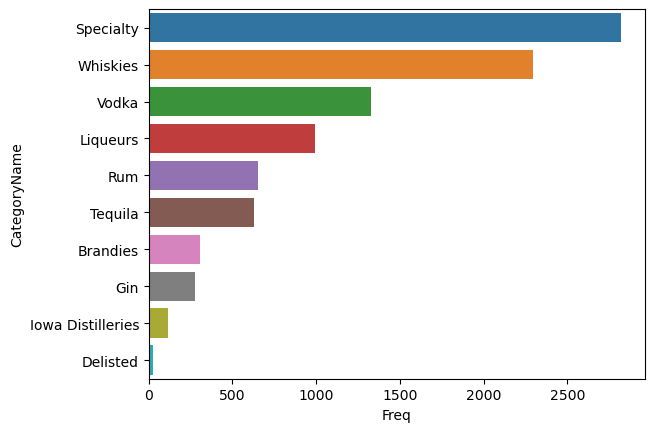

In [7]:
sns.barplot(data=product_per_cat, x='Freq', y=product_per_cat.index)

In [8]:
store_per_vendor = pd.read_sql_query(
    "SELECT DISTINCT VendorName, COUNT(Distinct StoreNumber) as Freq FROM Invoice as I INNER JOIN Vendor as V on I.VendorNumber=V.VendorNumber GROUP BY VendorName", conn)

<AxesSubplot:xlabel='Freq', ylabel='VendorName'>

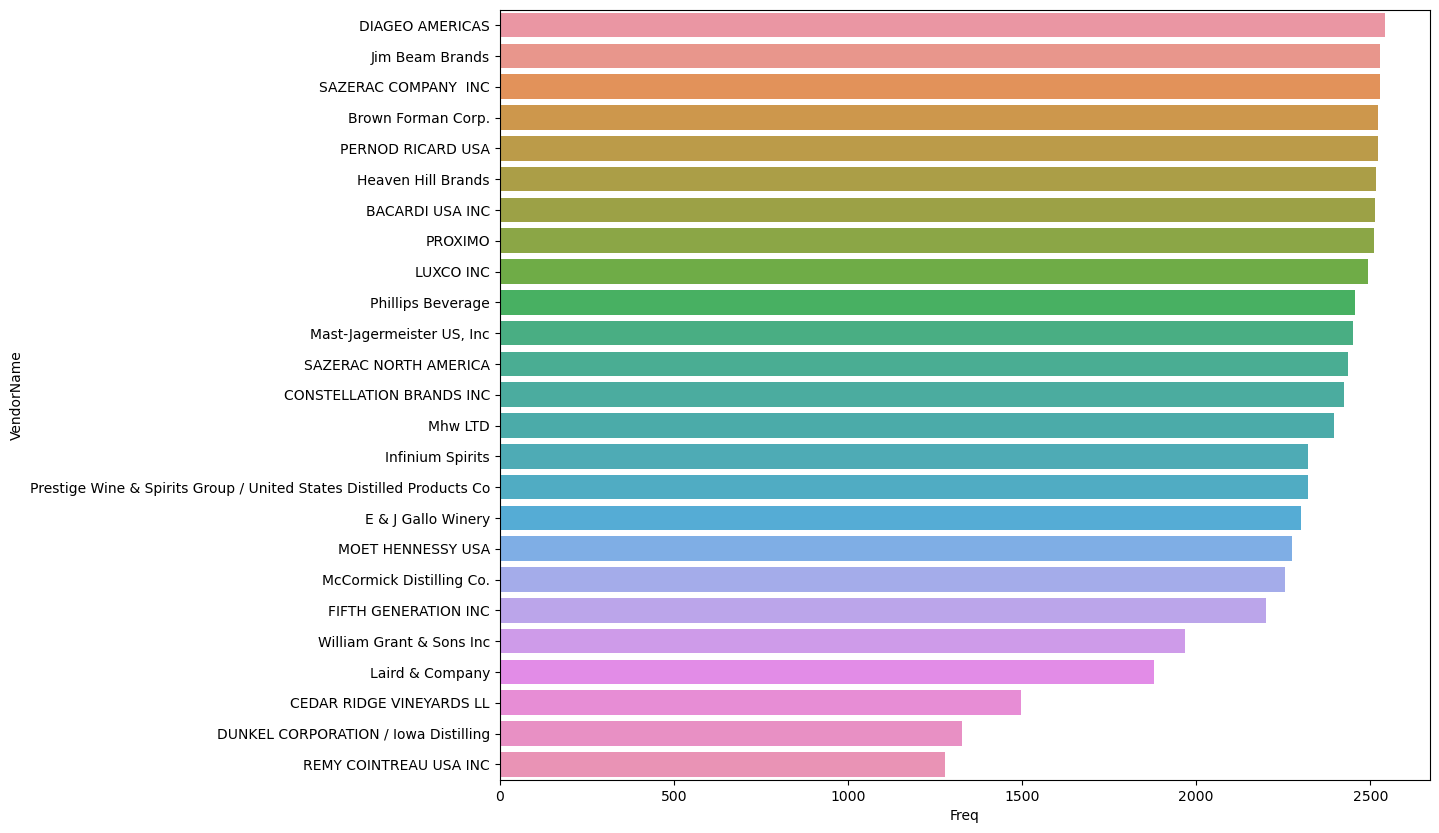

In [9]:
store_per_vendor = store_per_vendor.sort_values(by='Freq', ascending=False)
f, ax = plt.subplots(figsize=[12,10])
sns.barplot(data=store_per_vendor.iloc[0:25], x='Freq', y='VendorName')

In [10]:
vendor_per_store = pd.read_sql_query(
    "SELECT DISTINCT StoreName, COUNT(Distinct VendorName) as Freq FROM Invoice as I INNER JOIN Vendor as V on I.VendorNumber=V.VendorNumber INNER JOIN Store as S on I.StoreNumber=S.StoreNumber GROUP BY StoreName", conn)

<AxesSubplot:xlabel='Freq', ylabel='StoreName'>

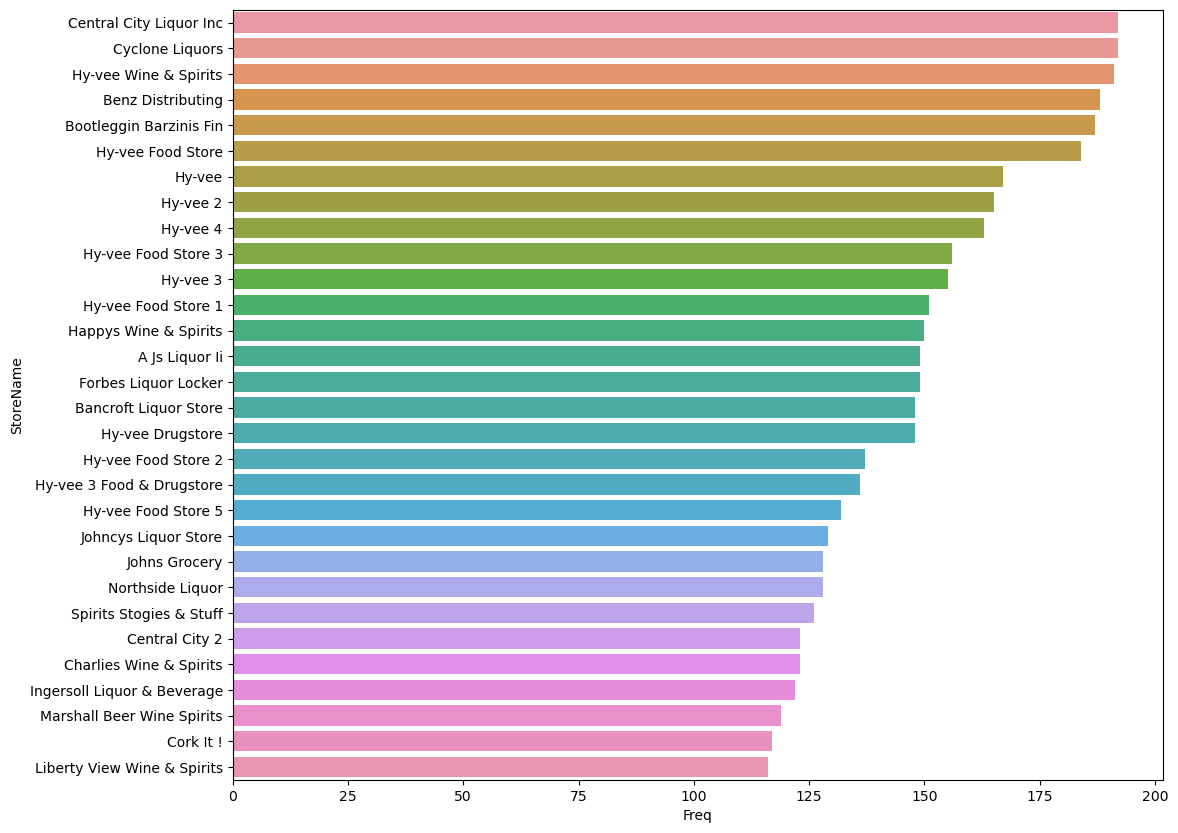

In [11]:
vendor_per_store = vendor_per_store.sort_values('Freq', ascending=False)
f, ax = plt.subplots(figsize=[12,10])
sns.barplot(data=vendor_per_store.iloc[0:30], x='Freq', y='StoreName')

Needs to be done still: Are there direct competitions among different vendors? Depict a story (case study) on their sale-channel growth/shrinkage.

- **Store Analysis**:
    - ~~Categorize the retail liquor stores into different types, chain-super market, specialized
    liquor stores, convenience stores, news stands, tobacco stores,..... and report the relevant statistics.~~
    - ~~New stores pop up and some of them shut down after a few years. Analyze the store opening dynamics
    and report the findings on store life-cycle, store survival analysis, survial curve, survival
    probabilities, etc. Refine your findings based on the store categories you design. Is it easy for
    the stores to experience sales volume growth? With new stores popping up for competition, how does
    it affect the sales of the existing stores?  
    Does the pie (Gross sales volume in **Iowa**) grow bigger? Do the stores share the bigger pie?~~
    Does the winner take all or more players share smaller slices?
    - ~~In terms of store inventories, report the varieties of product/product category for different
    store types. 
    What product/product category are the major sales contributors for different types of stores?~~
    - Study the monthly sales volumes and gross profits (without taking price-discounts into account)
    of the stores. 
    - Use the county population information, 
    say https://www.iowa-demographics.com/counties_by_population, to estimate the stores-per-capita in different
        counties. Use the chain-supermarket **Hy-Vee** as a case study, depict its store distribution
        in different counties of Iowa and the their liquor sales dynamics.
    - Within the context of **B2B**, 
    the stores play the role of the vendors' customers.
    Thus the concept and tools of customer analytics can be used to analyze the stores.
    As not all the stores can continue to survive or they might change their vendors, the vendors often would like to know the **customer lifetime value** of their customers (the stores).
    Provide an analysis on the **CLTV** (in a fixed time horizon) based on the natures of the stores.
    You may visit https://exponea.com/blog/customer-lifetime-value-guide/
    for an introduction to customer life-time value computation. Note that
    the 'customer churning', in the context of the liquor stores as the vendors' customers, must
    include the store shutting-down in your discussion.
    

In [12]:
store = pd.read_sql_query("SELECT DISTINCT * FROM Store", conn)
store.loc[store['County']=='Buena Vist', 'County'] = 'Buena Vista'
store.loc[store['County']=='Pottawatta', 'County'] = 'Pottawattamie'
store.loc[store['County']=='Obrien', 'County'] = "O'Brien"
store.loc[store['County']=='Cerro Gord', 'County'] = "Cerro Gordo"
store['County'] = store['County'] + ' County, Iowa'

In [13]:
geo = pd.read_csv('/Users/Gary/Dropbox/Projects/Liquor_Sales_Capstone_Project/data/cofips_IA.csv')
geo.columns = ['cty_fips', 'County']
geo['County'] = geo['County'] + ', Iowa'
store = store.merge(geo, on='County')

In [14]:
xlsx_path = 'https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres-19.xlsx'
iowa_pop = pd.read_excel(xlsx_path, skiprows=3,skipfooter=5)
iowa_pop = iowa_pop.loc[1:]
iowa_pop.columns = ['County' if i == 'Unnamed: 0' else i for i in iowa_pop.columns]
iowa_pop['County'] = [i.replace('.', '') for i in iowa_pop.County]
store = store.merge(iowa_pop, on='County', how='inner')
store

,StoreNumber,StoreName,Address,City,ZipCode,Latitude,Longitude,CountyNumber,County,cty_fips,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,2106,Hillstreet News & Tobacco,2217 COLLEGE,Cedar Falls,50613,42.52,-92.46,7,"Black Hawk County, Iowa",19013,...,131162,131584,131878,132933,133390,133701,133077,132238,131723,131228
1,2130,Sycamore Convenience,617 SYCAMORE,Waterloo,50703,42.50,-92.34,7,"Black Hawk County, Iowa",19013,...,131162,131584,131878,132933,133390,133701,133077,132238,131723,131228
2,2538,Hy-vee Food Store 3,1422 FLAMMANG DR,Waterloo,50702,42.46,-92.33,7,"Black Hawk County, Iowa",19013,...,131162,131584,131878,132933,133390,133701,133077,132238,131723,131228
3,2564,Hy-vee Food Store 4,4000 University,Waterloo,50701,42.51,-92.40,7,"Black Hawk County, Iowa",19013,...,131162,131584,131878,132933,133390,133701,133077,132238,131723,131228
4,2571,Hy-vee Food Store 2,2181 LOGAN AVE,Waterloo,50703,42.53,-92.34,7,"Black Hawk County, Iowa",19013,...,131162,131584,131878,132933,133390,133701,133077,132238,131723,131228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,4720,Chariton Bp,"107, EAST GRACE",Chariton,50049,41.01,-93.29,59,"Lucas County, Iowa",19117,...,8898,8880,8778,8697,8636,8610,8555,8533,8617,8600
2415,5218,Gasland Express,"2130, Court Ave",Chariton,50049,41.01,-93.33,59,"Lucas County, Iowa",19117,...,8898,8880,8778,8697,8636,8610,8555,8533,8617,8600
2416,5964,Caseys General Store 3032,335 N Main St,Chariton,50049,41.02,-93.31,59,"Lucas County, Iowa",19117,...,8898,8880,8778,8697,8636,8610,8555,8533,8617,8600
2417,5965,Caseys General Store 1499,418 S. 7th St,Chariton,50049,41.01,-93.30,59,"Lucas County, Iowa",19117,...,8898,8880,8778,8697,8636,8610,8555,8533,8617,8600


In [16]:
import re
store[['Hy-vee']] = [1 if re.findall('[Hh]y.*vee', i) else 0 for i in store.StoreName]
Hyvee_stores = store.groupby('County').agg(
    Freq=('Hy-vee','count'), 
    cty_fips=('cty_fips', 'mean'),
    Pop2010=(2010, 'mean'),
    Latitude=('Latitude', 'mean'),
    Longitude=('Longitude','mean'),
)
Hyvee_stores['store_per_1000pop'] = Hyvee_stores['Freq']/Hyvee_stores['Pop2010'] * 1000

In [23]:
# Install Geopandas for plotting
# US county shapefile is taken from US Census 
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
# Download the smallest "cb_2018_us_county_500k.zip"
import geopandas
counties = geopandas.read_file('/Users/Gary/Dropbox/Projects/Liquor_Sales_Capstone_Project/data/us-county-boundaries/us-county-boundaries.shp')
counties = counties.loc[counties.statefp=='19'] # Iowa state code
counties = counties[['geoid', 'geometry']]
counties.columns = ['cty_fips', 'geometry']
counties['cty_fips'] = counties['cty_fips'].astype('int32')
counties

,cty_fips,geometry
4,19031,"POLYGON ((-91.36608 41.86007, -91.36620 41.860..."
6,19089,"POLYGON ((-92.55374 43.42890, -92.55373 43.429..."
25,19181,"POLYGON ((-93.55821 41.51148, -93.55674 41.511..."
126,19121,"POLYGON ((-93.89712 41.50310, -93.89681 41.503..."
148,19165,"POLYGON ((-95.32481 41.86410, -95.32479 41.864..."
...,...,...
2981,19133,"POLYGON ((-96.30015 42.12770, -96.30052 42.127..."
3057,19123,"POLYGON ((-92.87100 41.42188, -92.87101 41.422..."
3081,19009,"POLYGON ((-95.09330 41.77694, -95.09329 41.777..."
3098,19023,"POLYGON ((-93.02598 42.73067, -93.02598 42.737..."


In [18]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# All stores

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

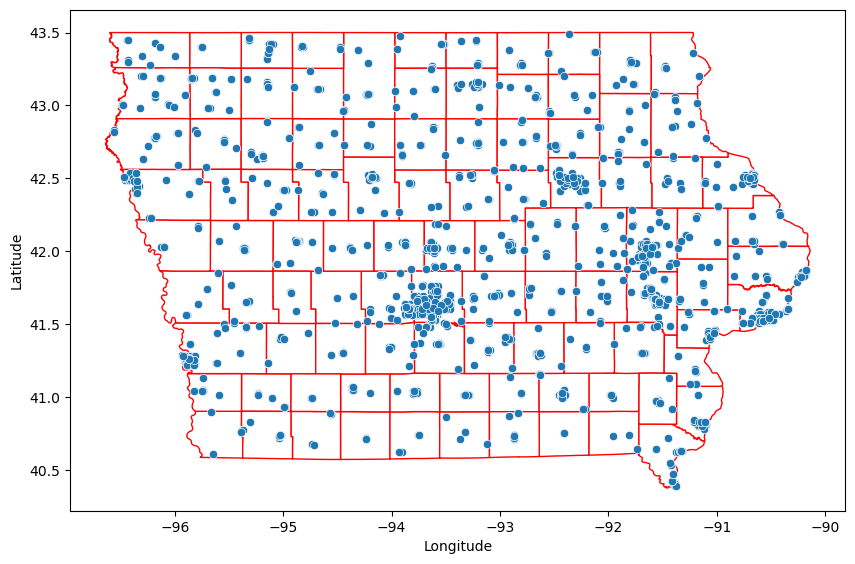

In [24]:
store = store.merge(counties, on='cty_fips')
store.loc[store.Latitude>44, 'Longitude'] = -91.113503
store.loc[store.Latitude>44, 'Latitude'] = 40.807048
counties.plot(color='white', edgecolor='red', figsize=[10,10])
sns.scatterplot(x='Longitude', y='Latitude', data=store)

# Hyvee stores

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

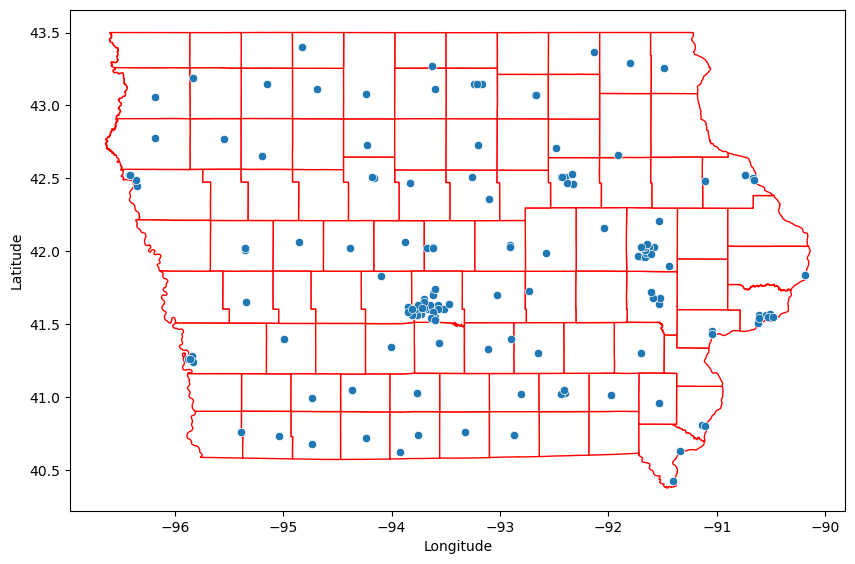

In [25]:
counties.plot(color='white', edgecolor='red', figsize=[10,10])
sns.scatterplot(x='Longitude', y='Latitude', data=store[store['Hy-vee']==1])

# Stores per 1000 pop in each county

<AxesSubplot:>

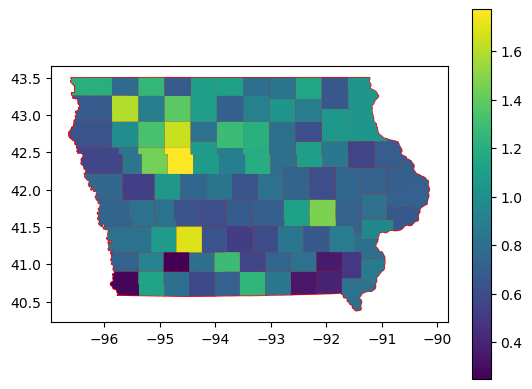

In [26]:
# Stores per 1000pop (County level)
store_per_1000pop_counties = counties.merge(Hyvee_stores, on='cty_fips')
fig, ax = plt.subplots(1, 1)
store_per_1000pop_counties.plot(color='white', edgecolor='red', ax=ax, figsize=[10,10])
store_per_1000pop_counties.plot(column='store_per_1000pop', ax=ax, legend=True)

- **Product Analysis**:
    - Among the near $10K$ liquor products, what product categories do they belong to? What 
    are the popular product categories?  
    What are the popular brands (in terms of product line-ups)?
    As there are too many categories to be considered, design a coarse-grained category system based on
    the types of liquor (Whiskies, Rum, ....) and domestic/import status.
    
    - **Product Survival**: How many products are introduced into the market every year? How many
    are removed from the market every year?  On average, what is the chance (probability) that a new product
    can survive till the end of the current data?
    
    By looking at each product category (or the coarse category you design), 
    your team can refine your analysis and paint a dynamical picture on
    the product's life-cycle and the market competition.
    
    - For simplicity, restrict the analysis to the products which are sold from the beginning (2012) to the end of the data.
    In terms of mean monthly sales volume and sales amount, which product, which brand and what category are
    the leaders and the laggers?
    
    - For the successful products (in an absolute term, or in the category) 
    which are sold well (top in the monthly sales volume or sales $\$$ list), 
    what are their sales channels?
    How many stores are they sold to? Among the popular products, is there a growth trend on the sale
    volume?
    Do the number of stores (sales-channels) grow w.r.t. time or is it the same store sales
    increment which is responsible for the sales growth? On the contrary, does the shrinkage of the sales channels
    induce the sales declines? 
    
    With the new products popping up constantly, is it easy for a typical liquor 
    product to experience sale-volume growth? Relate your discussion with liquor market competition.
    
    - For liquor products, alcohol content/retail price is the basic gauge on how cheap or expensive the
    products are. Study if there is any relationship between alcohol volume/$\$$ and the sales volume.
    - What kind of sales channels (chain-supermarket, specialized liquor store, convenience store, drug store, ....) are more
    important in terms of the sales?
    - **profit margin**: Using the state retail price - bottle cost as a proxy, estimate the
        profit margin of the individual products or the product categories. Which product, or product category
        offer higher profit margins?
    -  Looking at the quarterly aggregated sales volumes, do different products show seasonal popularity?
    For example, hypothetically the whiskies are super popular among the **Iowa** residents in the winter, etc. 
    - Alcohol is brewed from different types of starch, which are commodities. Thus the liquor
    prices are affected by the commodity prices. Throughout the years, the vendor may hike their
    liquor product prices to compensate the inflation pressure. Report the percentage price increments of
    different types of liquor products/product categories during the studied period 2012-current.

In [27]:
Hy_vee_products = pd.read_sql_query("SELECT StoreName, ItemDescription,CategoryName, VendorName, County, Sale, Date FROM Invoice as I INNER JOIN Store as S on I.StoreNumber=S.StoreNumber INNER JOIN Item as P on I.ItemNumber=P.ItemNumber WHERE S.StoreName LIKE '%Hy%'", conn)

Popularity by category

In [28]:
Hy_vee_products.groupby('CategoryName')['Sale'].sum().sort_values(ascending=False)

CategoryName
Whiskies             2.886757e+08
Vodka                2.190932e+08
Liqueurs             1.406606e+08
Rum                  1.068982e+08
Tequila              5.723259e+07
Specialty            4.125492e+07
Gin                  2.589963e+07
Brandies             1.984891e+07
Iowa Distilleries    1.923642e+06
Delisted             2.069893e+05
Name: Sale, dtype: float64

Popularity by vendor

In [29]:
Hy_vee_products.groupby('VendorName')['Sale'].sum().sort_values(ascending=False)

VendorName
DIAGEO AMERICAS               1.803347e+08
SAZERAC COMPANY  INC          8.044802e+07
Jim Beam Brands               7.937869e+07
PERNOD RICARD USA             7.193319e+07
Heaven Hill Brands            6.022456e+07
                                  ...     
St. Louis Distillery LLC      1.530000e+02
BROADSLAB DISTILLERY          1.243800e+02
Mason Dixon Spirits LLC       1.125000e+02
YAHARA BAY DISTILLERS INC     9.513000e+01
Puente International, Inc.    8.411000e+01
Name: Sale, Length: 241, dtype: float64

Popularity by county

In [30]:
Hy_vee_products.groupby('County')['Sale'].sum().sort_values(ascending=False)

County
Polk          2.486609e+08
Linn          7.971680e+07
Johnson       7.737845e+07
Scott         5.708697e+07
Black Hawk    3.482865e+07
                  ...     
Howard        1.581442e+05
Allamakee     1.283656e+05
Franklin      1.101412e+05
Warren        3.307274e+04
Buena Vist    4.272070e+03
Name: Sale, Length: 69, dtype: float64

In [31]:
Hy_vee_products['Date']=pd.to_datetime(Hy_vee_products['Date'], format='%m/%d/%Y')

In [32]:
Hy_vee_products_monthly = Hy_vee_products.groupby(['CategoryName', pd.Grouper(key='Date', freq='M')])['Sale'].sum()
Hy_vee_products_monthly

CategoryName  Date      
Brandies      2012-01-31     131834.59
              2012-02-29     107773.65
              2012-03-31     135260.40
              2012-04-30     130271.46
              2012-05-31     149798.06
                               ...    
Whiskies      2020-12-31    5035243.77
              2021-01-31    2757531.51
              2021-02-28    3086652.82
              2021-03-31    3540969.87
              2021-04-30    3091899.07
Name: Sale, Length: 1058, dtype: float64

<AxesSubplot:xlabel='Date'>

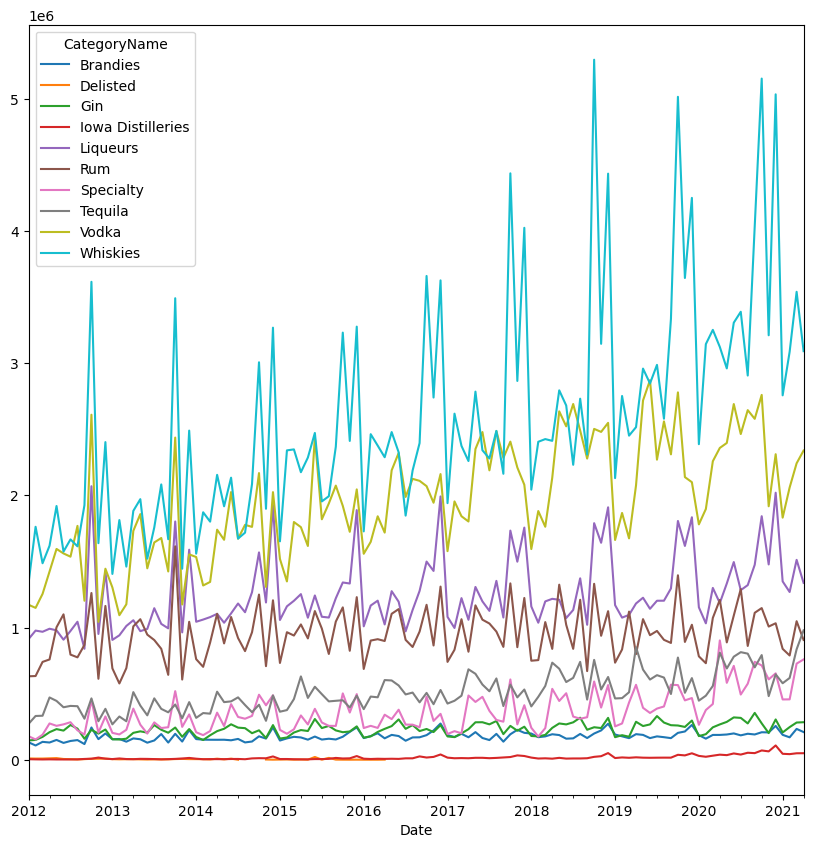

In [33]:
Hy_vee_products_monthly.reset_index().pivot_table(values='Sale', index='Date', columns='CategoryName').plot(figsize=[10,10])

In [34]:
Hy_vee_products['Date']=pd.to_datetime(Hy_vee_products['Date'], format='%m/%d/%Y')
Hy_vee_vendor_monthly = Hy_vee_products.groupby(['VendorName', pd.Grouper(key='Date', freq='M')])['Sale'].sum()
Hy_vee_vendor_monthly = Hy_vee_vendor_monthly.reset_index().pivot_table(values='Sale', index='Date', columns='VendorName')
Hy_vee_vendor_monthly

VendorName,3 BADGE CORPORATION,"3-Oaks Distillery, LLC",45TH PARALLEL SPIRITS,A HARDY USA LTD,A V BRANDS INC,AIKO IMPORTERS INC,AMERICAN SPIRITS EXCHANGE,AMERICAN VINTAGE BEVERAGE,ASD Spirits,"American Heritage Distillers, LLC / Century Farms Distillery",...,W J Deutsch & Sons LTD,WERNER DISTILLING,WESTERN SPIRITS BEVERAGE,Wild Agave Imports LLC,Wilderness Trail Distillery,Willett Distillery,William Grant & Sons Inc,World Trade Liquor Imports LLC,"Worldwide Libations, LLC",YAHARA BAY DISTILLERS INC
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2047.53,NaN,NaN,NaN,35192.95,NaN,658.80,NaN
2012-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2063.16,NaN,NaN,NaN,54638.29,NaN,131.76,NaN
2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136.08,NaN,2703.99,NaN,NaN,NaN,41859.08,NaN,NaN,NaN
2012-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136.08,NaN,2203.83,NaN,NaN,NaN,51692.94,NaN,NaN,NaN
2012-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2769.48,NaN,NaN,NaN,60957.37,NaN,263.52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,1921.30,162.0,273.31,NaN,NaN,NaN,857.69,NaN,NaN,3003.88,...,6969.48,NaN,46852.48,NaN,675.0,NaN,184262.86,NaN,4732.95,NaN
2021-01-31,693.12,297.0,447.05,NaN,NaN,NaN,1787.45,NaN,NaN,1351.57,...,5967.93,NaN,42120.18,NaN,1350.0,NaN,84305.48,342.0,2604.30,NaN
2021-02-28,433.20,54.0,413.04,NaN,NaN,NaN,382.92,NaN,NaN,1699.81,...,8458.17,NaN,28265.00,NaN,NaN,NaN,120112.09,NaN,2863.20,NaN


<AxesSubplot:xlabel='Date'>

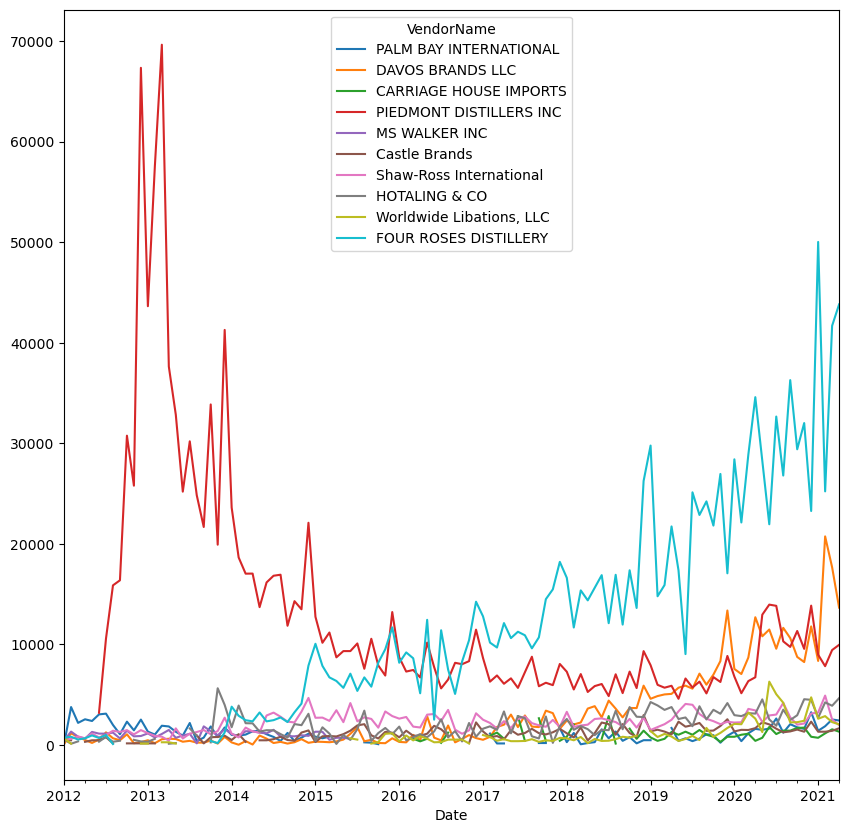

In [37]:
Hy_vee_vendor_monthly = Hy_vee_products.groupby(['VendorName', pd.Grouper(key='Date', freq='M')])['Sale'].sum()
Hy_vee_vendor_monthly = Hy_vee_vendor_monthly.reset_index().pivot_table(values='Sale', index='Date', columns='VendorName')
Hy_vee_vendor_monthly = Hy_vee_vendor_monthly.sort_values(by=Hy_vee_vendor_monthly.index[0], axis=1)
columns = Hy_vee_vendor_monthly.columns[0:10]
Hy_vee_vendor_monthly[columns].plot(figsize=[10,10])

# Not all products are consistently sold

<AxesSubplot:xlabel='Date'>

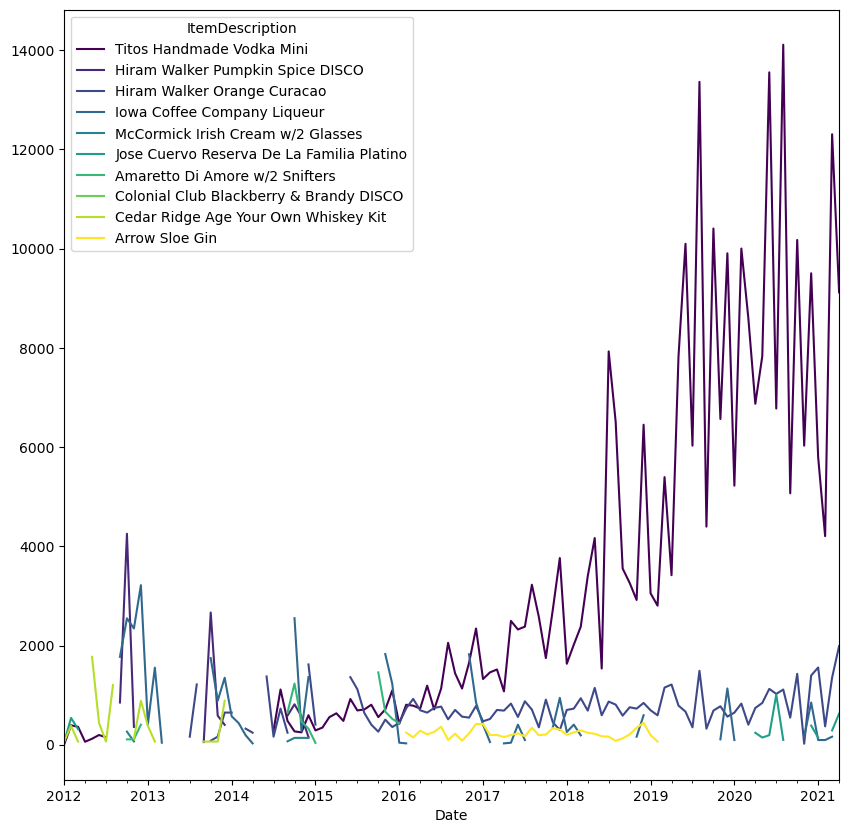

In [39]:
Hy_vee_product_monthly = Hy_vee_products.groupby(['ItemDescription', pd.Grouper(key='Date', freq='M')])['Sale'].sum()
Hy_vee_product_monthly = Hy_vee_product_monthly.reset_index().pivot_table(values='Sale', index='Date', columns='ItemDescription')
Hy_vee_product_monthly = Hy_vee_product_monthly.sort_values(by=Hy_vee_product_monthly.index[0], axis=1)
columns = Hy_vee_product_monthly.columns[0:10]
Hy_vee_product_monthly[columns].plot(figsize=[10,10],colormap='viridis')

# Mispellings

In [ ]:
store = pd.read_sql_query("SELECT DISTINCT * FROM Store", conn)
store.loc[store['County']=='Buena Vist', 'County'] = 'Buena Vista'
store.loc[store['County']=='Pottawatta', 'County'] = 'Pottawattamie'
store.loc[store['County']=='Obrien', 'County'] = "O'Brien"
store.loc[store['County']=='Cerro Gord', 'County'] = "Cerro Gordo"
store['County'] = store['County'] + ' County, Iowa'